In [28]:
#Module importing
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [73]:
# importing dataset and Preprocessing for feeding in
(X_train,y_train),(X_test,y_test)=mnist.load_data()

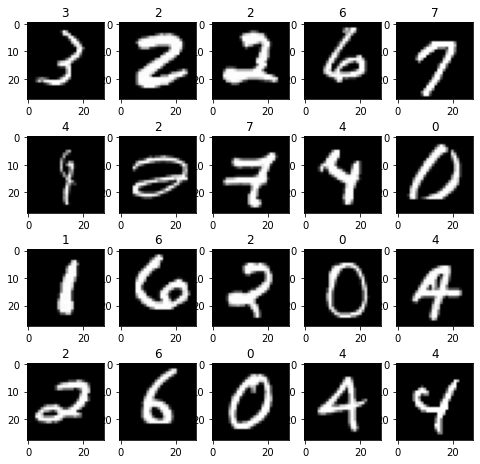

In [74]:
fig = plt.figure(figsize=(8, 8))
# ax.ravel()
for x in range(1,21):
  index=np.random.randint(60000)
  fig.add_subplot(4, 5, x)
  plt.imshow(X_train[index],cmap='gray')
  
  plt.title(y_train[index])
plt.show()

In [75]:
# Flattening and standardising images for artificial Neural Network
flattened = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],flattened).astype('float32')
X_test = X_test.reshape(X_test.shape[0],flattened).astype('float32')


In [76]:
X_train = X_train/255
X_test = X_test/255

In [77]:
type(X_train[89])

numpy.ndarray

In [78]:
#adding Noise to Train Images

noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

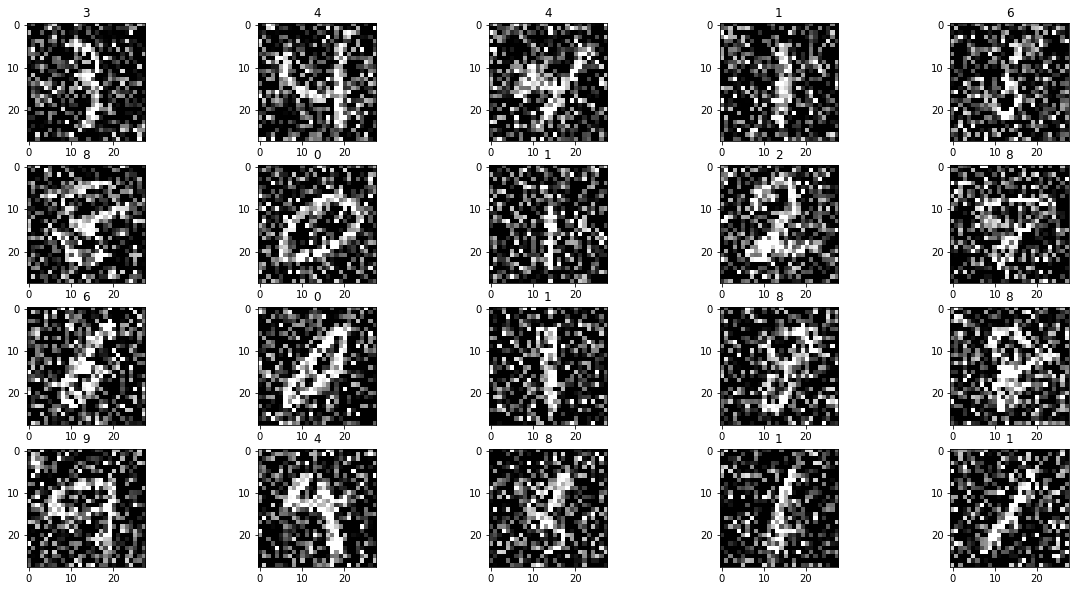

In [79]:
#Noisey image
fig = plt.figure(figsize=(20, 10))
# ax.ravel()
for x in range(1,21):
  index=np.random.randint(60000)
  fig.add_subplot(4, 5, x)
  test = x_train_noisy*255
  test = test.reshape(test.shape[0],28,28)
  plt.imshow(test[index],cmap='gray')
  
  plt.title(y_train[index])
plt.show()

In [80]:

# Creating model using Artificial Neural Network (That is using only flatten adn dense layers and not other layers)
from tensorflow.keras.layers import Input
from tensorflow.keras.activations import relu,sigmoid
input_layer = Input(784)
x = Dense(600,activation='relu')(input_layer)
# x = relu()(x)
x = Dense(300,activation='relu')(x)
# x = relu()(x)
x = Dense(150,activation='relu')(x)
# x = relu()(x)
x = Dense(20,activation='relu')(x)
# x = relu()(x)

#Decoder below
x = Dense(20,activation='relu')(x)
# x = relu()(x)
x = Dense(150,activation='relu')(x)
# x = relu()(x)
x = Dense(300,activation='relu')(x)
# x = relu()(x)
x = Dense(600,activation='relu')(x)
# x = relu()(x)
output = Dense(784,activation='sigmoid')(x)
# output = sigmoid(784)(x)



In [81]:
# Compile the model
model = Model(input_layer,output)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [82]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 600)               471000    
                                                                 
 dense_11 (Dense)            (None, 300)               180300    
                                                                 
 dense_12 (Dense)            (None, 150)               45150     
                                                                 
 dense_13 (Dense)            (None, 20)                3020      
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dense_15 (Dense)            (None, 150)               3150

In [83]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 13s 41ms/step - loss: 0.0627 - accuracy: 0.0119 - val_loss: 0.0446 - val_accuracy: 0.0159
Epoch 2/10
300/300 [==============================] - 12s 41ms/step - loss: 0.0370 - accuracy: 0.0139 - val_loss: 0.0320 - val_accuracy: 0.0149
Epoch 3/10
300/300 [==============================] - 12s 40ms/step - loss: 0.0304 - accuracy: 0.0135 - val_loss: 0.0287 - val_accuracy: 0.0111
Epoch 4/10
300/300 [==============================] - 12s 40ms/step - loss: 0.0275 - accuracy: 0.0130 - val_loss: 0.0263 - val_accuracy: 0.0139
Epoch 5/10
300/300 [==============================] - 12s 40ms/step - loss: 0.0252 - accuracy: 0.0132 - val_loss: 0.0249 - val_accuracy: 0.0135
Epoch 6/10
300/300 [==============================] - 12s 40ms/step - loss: 0.0235 - accuracy: 0.0138 - val_loss: 0.0235 - val_accuracy: 0.0130
Epoch 7/10
300/300 [==============================] - 12s 41ms/step - loss: 0.0221 - accuracy: 0.0144 - val_loss: 0.0226 - val_accuracy:

In [84]:
pred = model.predict(x_test_noisy)

In [85]:
pred.shape,X_test.shape

((10000, 784), (10000, 784))

In [86]:
X_test = np.reshape(X_test, (10000,28,28)) *255
pred = np.reshape(pred, (10000,28,28)) *255
x_test_noisy = np.reshape(x_test_noisy, (-1,28,28)) *255

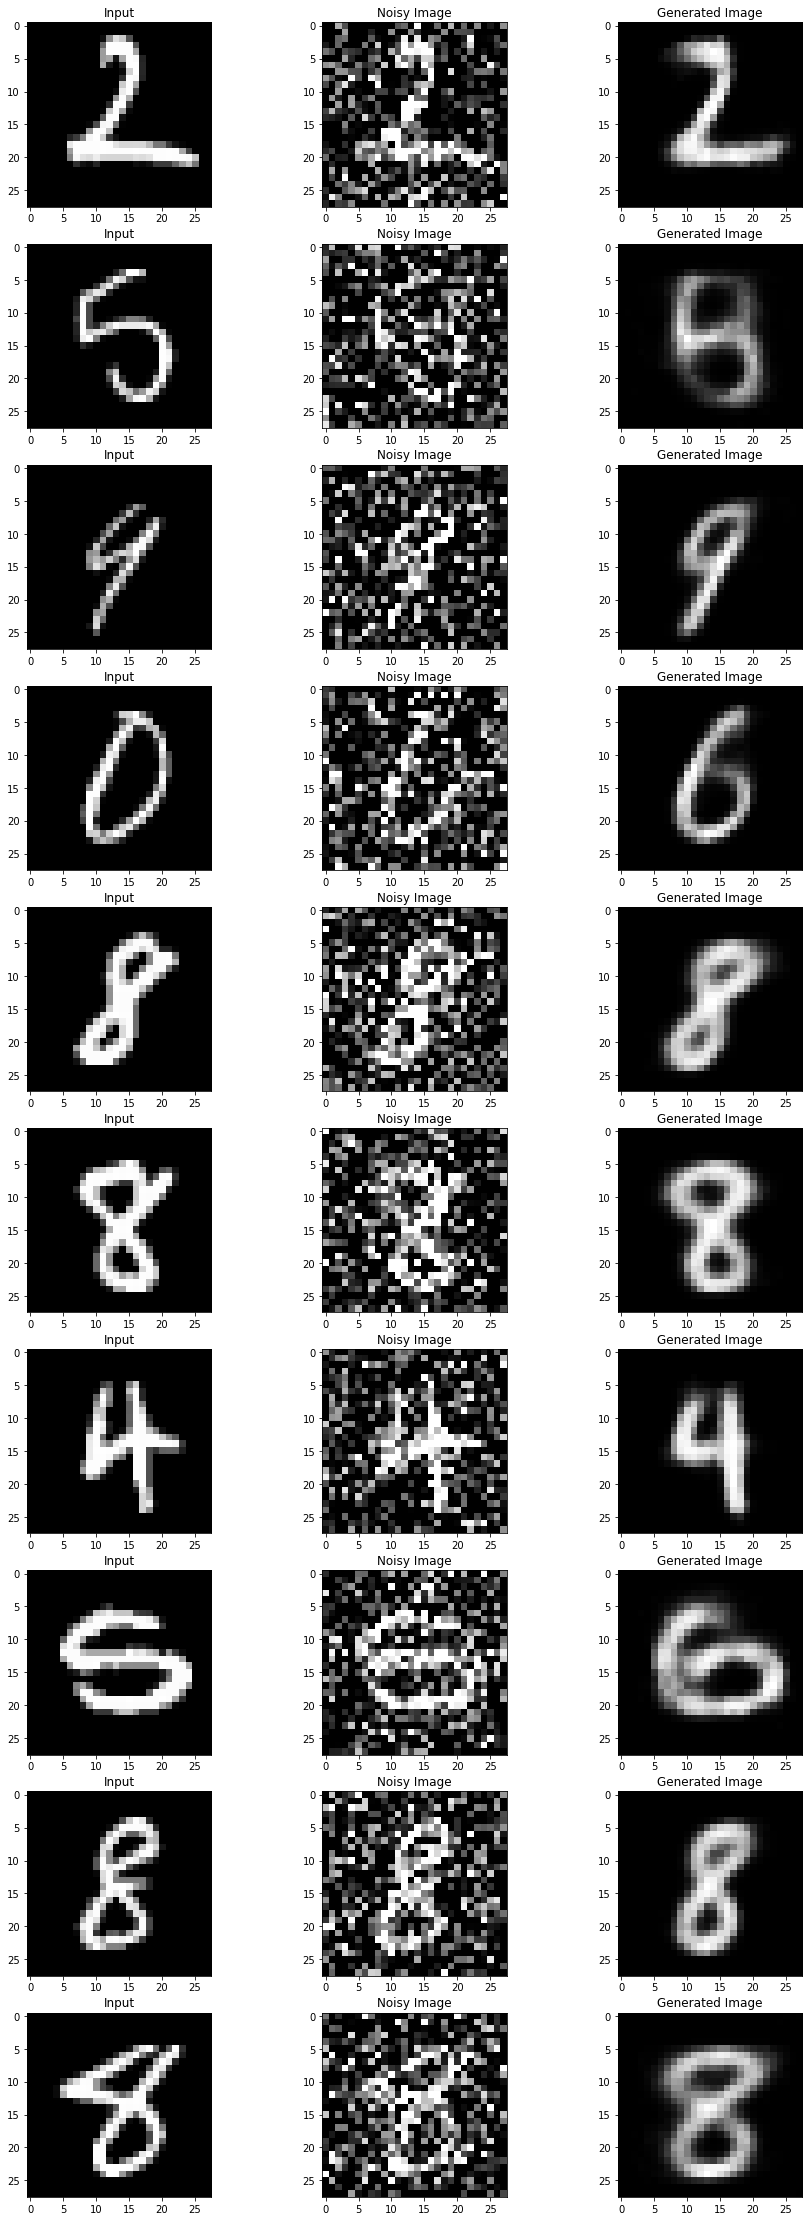

In [87]:
fig = plt.figure(figsize=(15, 40))
index = 0
for i in range(1,11):
  index =  index + 1
  fig.add_subplot(10,3,index)
  plt.imshow(X_test[i+4366],cmap='gray')
  plt.title('Input')
  # plt.show()
  index = index + 1
  fig.add_subplot(10,3,index)
  plt.imshow(x_test_noisy[i+4366],cmap='gray')
  plt.title('Noisy Image')
  # plt.show()
  index = index + 1
  fig.add_subplot(10,3,index)
  plt.imshow(pred[i+4366],cmap='gray')
  plt.title('Generated Image')
  # plt.show()
  # temp = 4
plt.show()